In [31]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#from datascience import *

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


sns.set()
%matplotlib inline


df = pd.read_csv("AppleStore.csv") 

In [10]:
df.shape

(11100, 17)

In [11]:
apps = pd.read_csv("AppleStore.csv")
apps

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,0
6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1,0
7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,0
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,0
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,0


In [14]:
#narrowing down the columns
##sort_by_rating_top5 = apps.sort_values('user_rating_ver', ascending = False)
#apps.loc[[2,8,12], :]
#sort_by_rating_top5.head(n=10)
full = Table.read_table('AppleStore.csv')
partial = full.select(['track_name','user_rating','prime_genre'])
partial


track_name,user_rating,prime_genre
PAC-MAN Premium,4,Games
Evernote - stay organized,4,Productivity
"WeatherBug - Local Weather, Radar, Maps, Alerts",3.5,Weather
"eBay: Best App to Buy, Sell, Save! Online Shopping",4,Shopping
Bible,4.5,Reference
Shanghai Mahjong,4,Games
PayPal - Send and request money safely,4,Finance
Pandora - Music & Radio,4,Music
PCalc - The Best Calculator,4.5,Utilities
Ms. PAC-MAN,4,Games


In [15]:
#Sorting the top 20 apps by user rating and listing the genre 
partial.sort('user_rating',descending =True).show(10)


track_name,user_rating,prime_genre
Escape the Sweet Shop Series,5,Games
Laurie Hernandez the Human Emoji,5,Utilities
Room Escape Game - Santa's Room,5,Games
CTFxCmoji,5,Social Networking
4x4 Dirt Track Trials Forest Driving Parking Sim,5,Games
VPN Go - Safe Fast & Stable VPN Proxy,5,Business
Stickman Base Jumper 2,5,Games
DELISH KITCHEN - レシピ動画で料理を簡単に,5,Food & Drink
脱出ゲーム KOTATSU,5,Games
Escape a Crepe House,5,Games


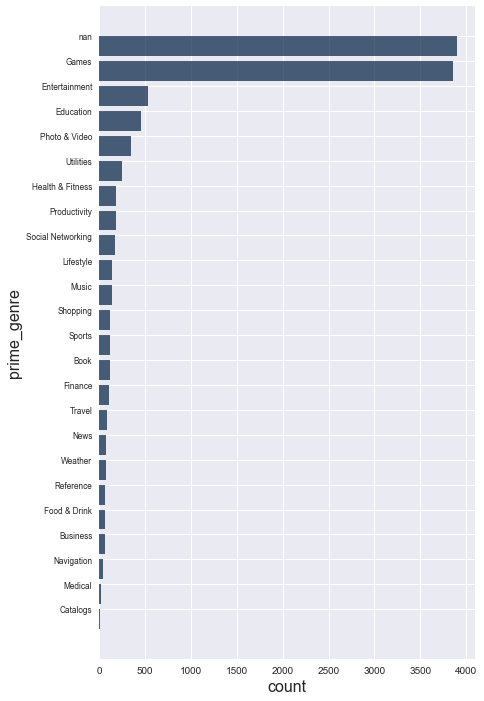

In [16]:
#grouping the data by genre and counting how many of the 7200 apps are of each genre.
genrelist = full.group('prime_genre').sort("count", descending = True).barh('prime_genre','count')
genrelist

In [17]:

df.isnull().values.any()

True

In [18]:

#train-test split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [19]:
df_copy = train_set.copy()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0


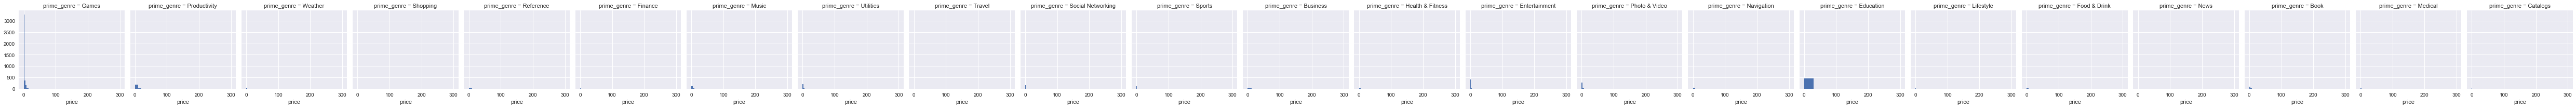

In [84]:
multiples = sns.FacetGrid(df, col = "prime_genre")
multiples = multiples.map(plt.hist, "price")




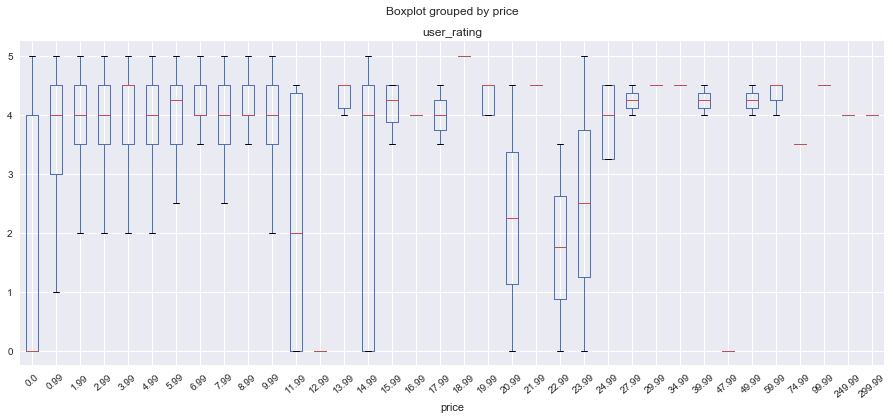

In [114]:
df.boxplot('user_rating','price',rot = 40,figsize=(15,6))

Text(0,0.5,'Number Of Downloads')

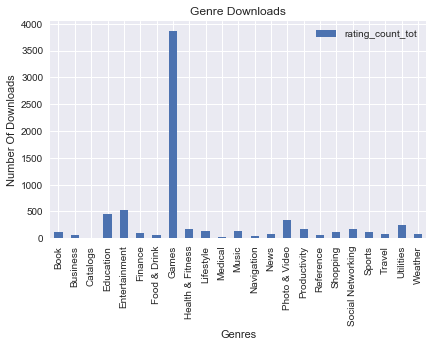

In [116]:
# use a visualization to display that same data, including a title and x and y labels
df[['prime_genre','rating_count_tot']].groupby('prime_genre').count().plot(kind='bar', title='Genre Downloads')
plt.xlabel('Genres')
plt.ylabel('Number Of Downloads')